<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/05_multidimensional_arrays_also_plotting/05_warmup.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Data Wrangling

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/fall_2025_iub/content/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 05 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

```{tip}
Instead of downloading the above CSV file, you can also read it directly into a pandas DataFrame using the URL.
```

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

```{note}
If you are using RED Desktop, make sure to use the `easg690_shared` kernel when running this notebook.
```

# Solution

*start you markdown comments here*

In [21]:
""" Import libraries """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
""" Load the CSV file """
usgs_pd = pd.read_csv("usgs_major_earthquakes_1900-2023.csv", header = 0, parse_dates = [0])
print(usgs_pd)

                                  time  latitude  longitude    depth   mag  \
0     2023-09-21 21:11:49.950000+00:00  -14.0039   167.1898  188.419  6.10   
1     2023-09-20 14:45:58.609000+00:00   -4.5826  -105.6493   10.000  6.00   
2     2023-09-18 13:21:23.790000+00:00   26.4336   125.3032  183.483  6.30   
3     2023-09-13 11:49:15.926000+00:00  -36.2201   -97.9378   10.000  6.10   
4     2023-09-12 11:03:18.873000+00:00   19.2687   121.2178   41.281  6.30   
...                                ...       ...        ...      ...   ...   
13922        1902-01-01 05:20:30+00:00   52.3800  -167.4500      NaN  7.00   
13923        1901-12-31 09:02:30+00:00   51.4500  -171.0200      NaN  7.10   
13924        1901-12-30 22:34:00+00:00   52.0000  -160.0000      NaN  7.00   
13925        1901-03-03 07:45:00+00:00   36.0000  -120.5000      NaN  6.40   
13926        1900-10-09 12:25:00+00:00   57.0900  -153.4800      NaN  7.86   

      magType    nst    gap    dmin   rms  ...                 

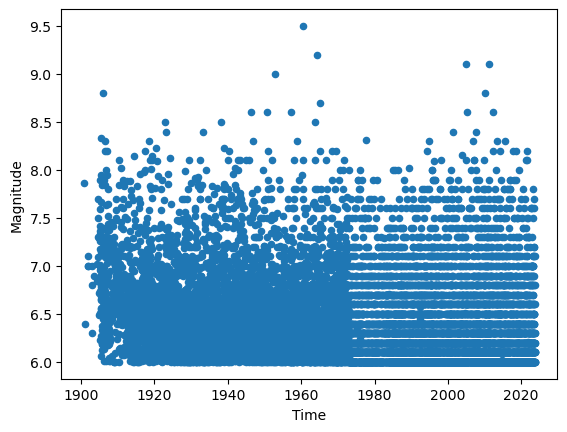

In [23]:
""" Plot the magnitudes versus time. """
fig, ax = plt.subplots()

usgs_pd.plot.scatter('time', 'mag', ax=ax)#, marker='.')
ax.set_ylabel('Magnitude')
ax.set_xlabel('Time')

plt.show()


In [27]:
""" Use groupby to calculate the sum of earthquakes within each year. """

# get the year of each earthquake
earthquake_year = usgs_pd['time'].dt.year

# group by year
usgs_year_group = usgs_pd.groupby(earthquake_year)

# get the number of counts in each year
usgs_year_counts = usgs_year_group['mag'].count()

# get the average magnitude in each year
usgs_year_mag = usgs_year_group['mag'].mean()


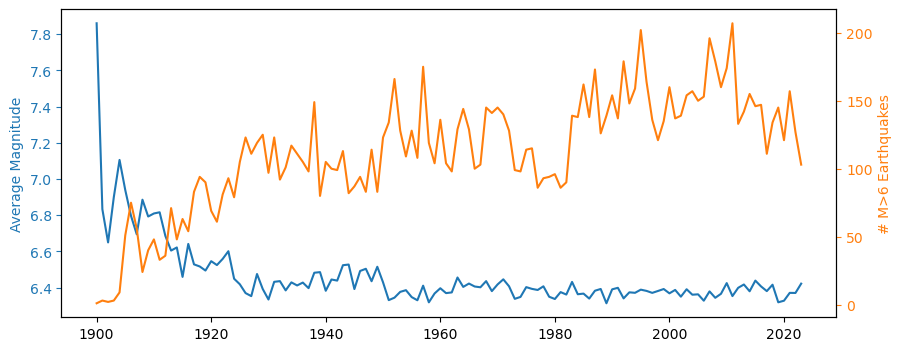

In [28]:
""" Generate plots of the mean magnitude and total count by year. """

# make the figure
fig, ax = plt.subplots(figsize=(10,4))
# draw the plot
l1 = ax.plot(usgs_year_mag, color = 'C0', label = 'Average Magnitude')
# create a twin axis
ax2 = ax.twinx()
# draw the plot
l2 = ax2.plot(usgs_year_counts, color = 'C1', label = '# M>6 Earthquakes')

# set labels
ax.set_ylabel("Average Magnitude")
ax2.set_ylabel("# M>6 Earthquakes")

# set the color of the y-axis tick labels, ticks, and labels to match the line color
ax.tick_params(axis='y', colors=l1[0].get_color())
ax2.tick_params(axis='y', colors=l2[0].get_color())
ax.yaxis.label.set_color(l1[0].get_color())
ax2.yaxis.label.set_color(l2[0].get_color())

# show the plot
plt.show()

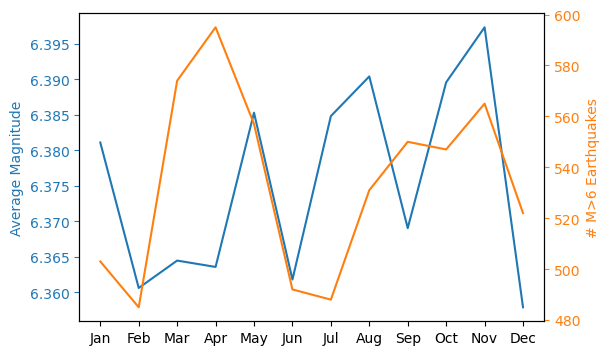

In [29]:
""" Calculate the seasonal cycle of earthquake count. """

# subset the data to only include 1980 to present
usgs_pd_recent = usgs_pd[usgs_pd['time'].dt.year >= 1980]

# get the monthh of each earthquake
earthquake_month = usgs_pd_recent['time'].dt.month

# group by month
usgs_month_group = usgs_pd_recent.groupby(earthquake_month)

# get the number of counts in each month
usgs_month_counts = usgs_month_group['mag'].count()

# get the average magnitude in each month
usgs_month_mag = usgs_month_group['mag'].mean()

# make the figure
fig, ax = plt.subplots(figsize=(6,4))

#draw the plot 
l1 = ax.plot(usgs_month_mag, color='C0', label = 'Average Magnitude')
# create a twin axis
ax2 = ax.twinx()
# draw the plot
l2 = ax2.plot(usgs_month_counts, color='C1', label = '# M>6 Earthquakes')

# set labels
ax.set_ylabel("Average Magnitude")
ax2.set_ylabel("# M>6 Earthquakes")

# set the color of the y-axis tick labels, ticks, and labels to match the line color
ax.tick_params(axis='y', colors=l1[0].get_color())
ax2.tick_params(axis='y', colors=l2[0].get_color())
ax.yaxis.label.set_color(l1[0].get_color())
ax2.yaxis.label.set_color(l2[0].get_color())

# label the x-axis as month names
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# show the plot
plt.show()